In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Exploratory Data Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_4500\2586400808.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index


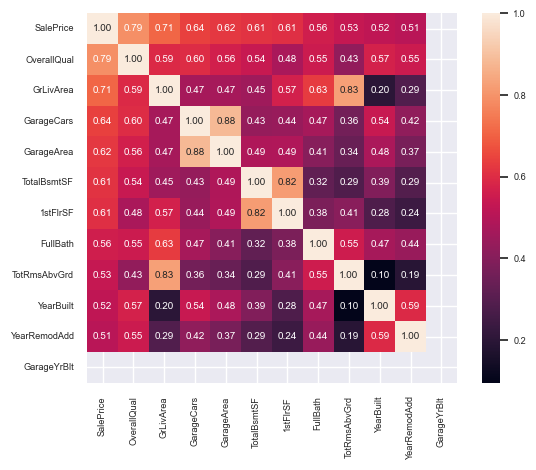

In [ ]:
#Eksploratory data analysis
k = 12
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 0.60)
hm = sns.heatmap(cm, cbar = True, square = True, annot = True, fmt = '.2f', xticklabels = cols.values, yticklabels = cols.values)

We have 10-highest-correlation features with the price of the house. Let's check it one by one

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

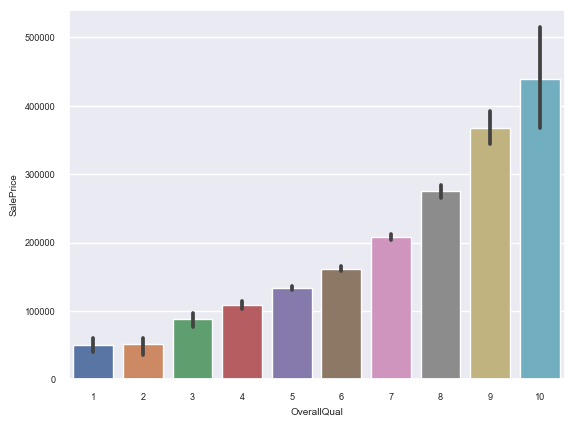

In [ ]:
#OverallQual is one of the highest corr score 
sns.barplot(data = df_train, x = 'OverallQual', y = 'SalePrice')

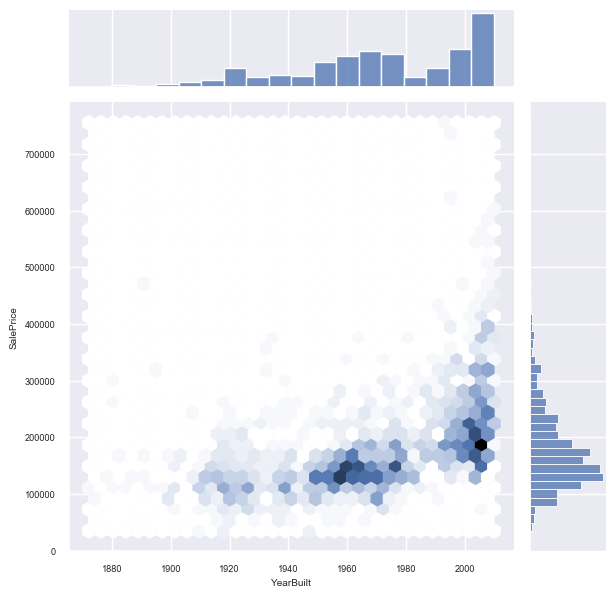

In [6]:
#SalePrice vs Yearbuild
sns.jointplot(data = df_train, x = df_train['YearBuilt'], y= df_train['SalePrice'], kind = 'hex')

The most of the houses is from about 1950s to 2000s with range of sale 100k to 300k dollars.

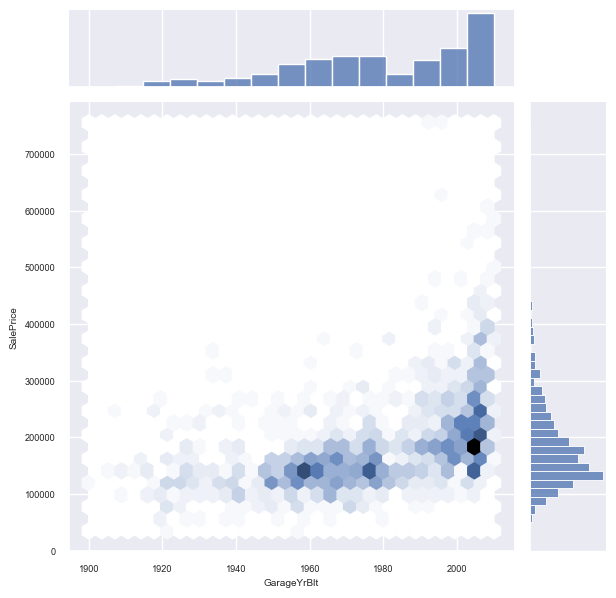

In [7]:
#Garage Year Built (GarageYrBlt) feature vs Saleprice in hexagonplot
sns.jointplot(data = df_train, x = df_train['GarageYrBlt'], y= df_train['SalePrice'], kind = 'hex')

Similar pattern with the YearBuilt feature. This similar pattern indicates that most of the house was built with its garage.

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

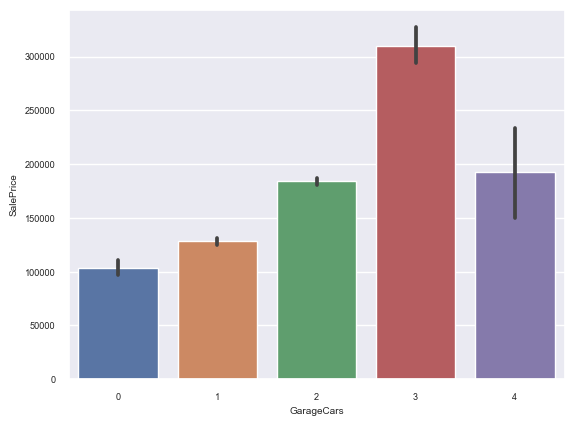

In [8]:
#GarageCars vs SalePrice
sns.barplot(data = df_train, x = df_train['GarageCars'], y = df_train['SalePrice'])

Te house with 3 Garages is more expensive, in average, than 4. It means that this house feature has small linearity to the price of the house.

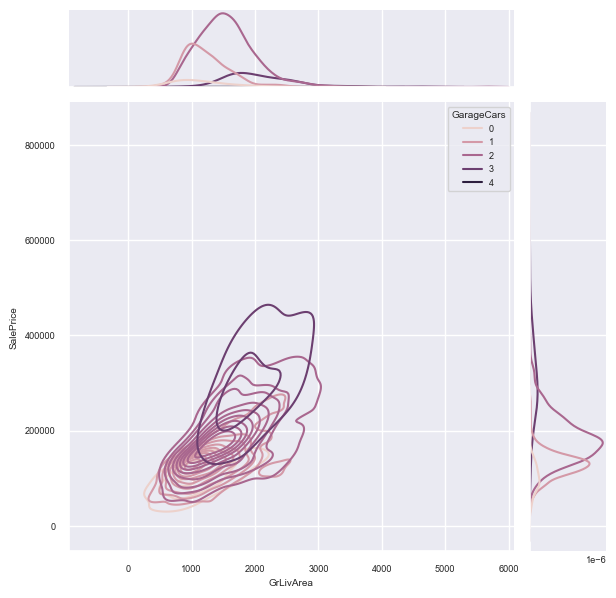

In [9]:
#SalePrice vs GrLivArea (based on GarageCars)
sns.jointplot(data = df_train, x = df_train['GrLivArea'], y = df_train['SalePrice'], kind = 'kde', hue = df_train['GarageCars'], color='red')

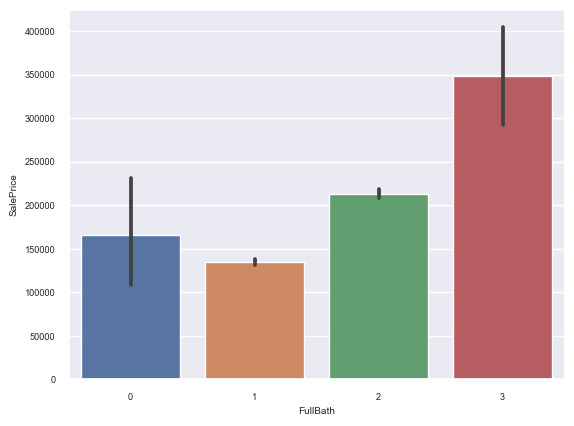

In [20]:
#FullBath vs SalePrice

sns.barplot(data = df_train, x = df_train.FullBath, y = df_train.SalePrice)
plt.show()

It looks like No FullBath is more expensive than have 1 FullBath. This feature has no correlation with the price of the house.

<Axes: xlabel='BldgType', ylabel='SalePrice'>

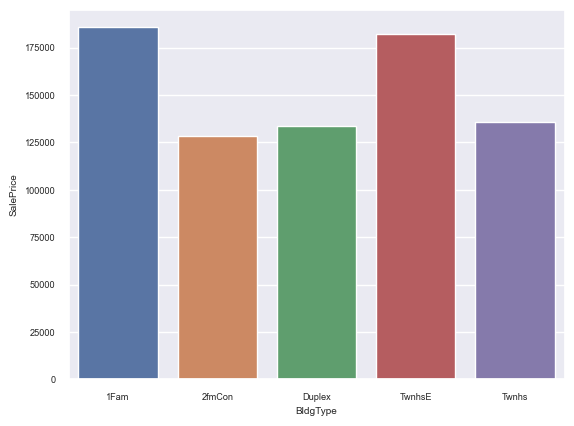

In [38]:
sns.barplot(data = df_train, x = df_train['BldgType'], y = df_train['SalePrice'], errorbar=None)

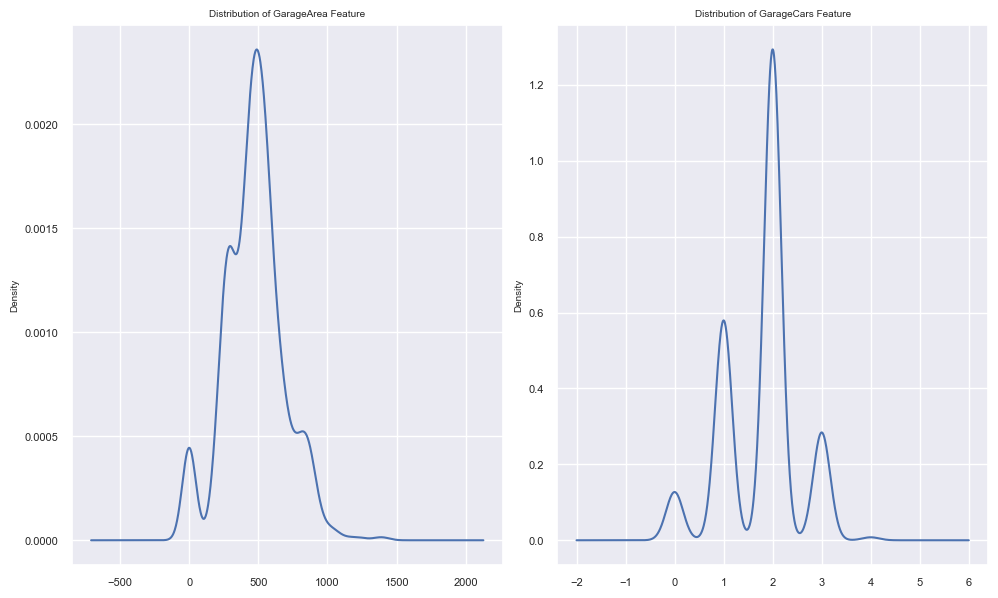

In [51]:
#Gaussian Distribution of GarageX features
fig, axs = plt.subplots(1,2, figsize = (10,6))

df_train['GarageArea'].plot(kind = 'density', ax = axs[0], xlabel = 'GarageArea', title = 'Distribution of GarageArea Feature', fontsize = 8)
df_train['GarageCars'].plot(kind = 'density', ax = axs[1], xlabel = 'GarageCars', title = 'Distribution of GarageCars Feature', fontsize = 8)
fig.tight_layout()

<Axes: xlabel='SalePrice', ylabel='Density'>

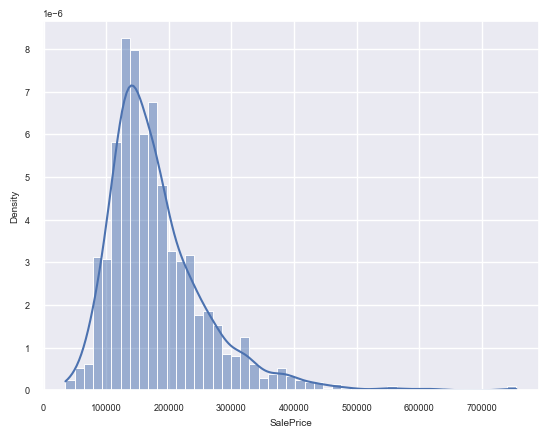

In [10]:
#Gaussian Distribution of SalePrice
from scipy import stats
from scipy.stats import norm

sns.histplot(df_train['SalePrice'], kde = True, stat = 'density')

<Axes: xlabel='GrLivArea', ylabel='Density'>

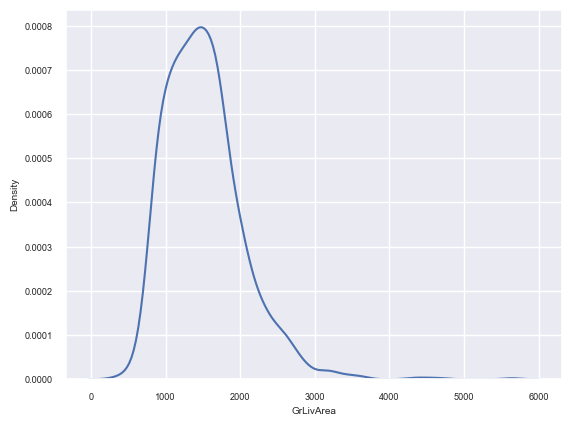

In [11]:
#GrLivArea Gaussian distribution
sns.kdeplot(df_train['GrLivArea'])

<Axes: xlabel='GarageCars', ylabel='Density'>

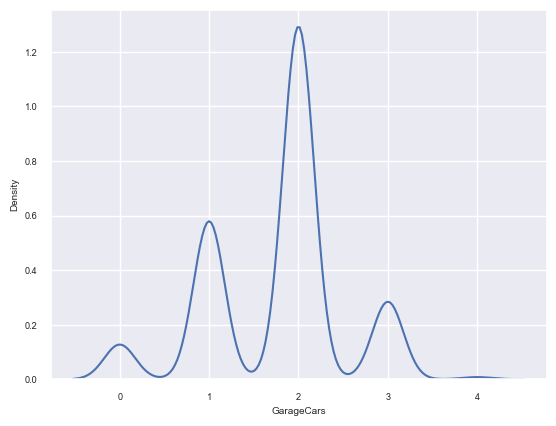

In [12]:
#GarageCars Gaussian Distribution
sns.kdeplot(df_train['GarageCars'])

### Preprocessing 

In [13]:
# Count total missing data
total = df_train.isnull().sum().sort_values(ascending= False)
percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


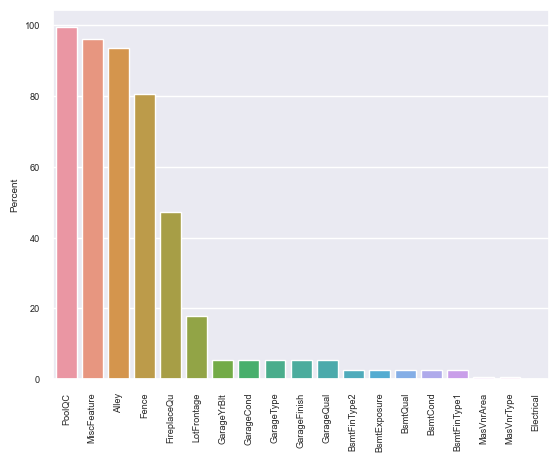

In [14]:
#Create a barplot
true_miss_data = missing_data.drop(missing_data[missing_data['Total']==0].index)
sns.barplot(data = true_miss_data, x = true_miss_data.index, y = true_miss_data.Percent)
plt.xticks(rotation = 90)
plt.show()

In [15]:
#Drop the columns with the most null value 
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'], axis = 1, inplace = True)

In [16]:
#Let's check zero value each column
df_train[df_train[df_train.columns]==0].count().sort_values(ascending = False).head(20)

PoolArea         1453
3SsnPorch        1436
LowQualFinSF     1434
MiscVal          1408
BsmtHalfBath     1378
ScreenPorch      1344
BsmtFinSF2       1293
EnclosedPorch    1252
HalfBath          913
MasVnrArea        861
BsmtFullBath      856
2ndFlrSF          829
WoodDeckSF        761
Fireplaces        690
OpenPorchSF       656
BsmtFinSF1        467
BsmtUnfSF         118
GarageArea         81
GarageCars         81
TotalBsmtSF        37
dtype: int64

In [17]:
object_data = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [18]:
#Encode 
from sklearn.preprocessing import OrdinalEncoder

X_train = df_train.drop(['SalePrice','Id'], axis = 1)
y_train = df_train['SalePrice']

oe = OrdinalEncoder()
X_train[object_data] = oe.fit_transform(X_train[object_data]) 

In [19]:
X_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,5.0,...,61,0,0,0,0,0,2,2008,8.0,4.0
1,20,3.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,24.0,...,0,0,0,0,0,0,5,2007,8.0,4.0
2,60,3.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,5.0,...,42,0,0,0,0,0,9,2008,8.0,4.0
3,70,3.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,6.0,...,35,272,0,0,0,0,2,2006,8.0,0.0
4,60,3.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,15.0,...,84,0,0,0,0,0,12,2008,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3.0,7917,1.0,3.0,3.0,0.0,4.0,0.0,8.0,...,40,0,0,0,0,0,8,2007,8.0,4.0
1456,20,3.0,13175,1.0,3.0,3.0,0.0,4.0,0.0,14.0,...,0,0,0,0,0,0,2,2010,8.0,4.0
1457,70,3.0,9042,1.0,3.0,3.0,0.0,4.0,0.0,6.0,...,60,0,0,0,0,2500,5,2010,8.0,4.0
1458,20,3.0,9717,1.0,3.0,3.0,0.0,4.0,0.0,12.0,...,0,112,0,0,0,0,4,2010,8.0,4.0


### Modelling

In [20]:
#performded feature selection
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_train, y_train = make_regression(n_samples = 1000, n_features=10)

In [21]:
#define feature selection
fs = SelectKBest(score_func=f_regression)
#apply feature selection
X_trn_selected = fs.fit_transform(X_train, y_train)
print(X_trn_selected.shape)

(1000, 10)


In [22]:
#We have 10 crucial features, how do we know what the features are.
cols_idxs = fs.get_support(indices=True)
new_feature = df_train.iloc[:,cols_idxs]
new_feature.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope'],
      dtype='object')

In [23]:
#Import Scikit Learn Packages
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [24]:
def rmse_cv (model):
    rmse = np.sqrt(-cross_val_score(model, X_trn_selected, y_train, scoring = 'neg_mean_squared_error', cv = 5))
    return rmse

In [25]:
alphas = [0.05, 0.1, 1, 1.5, 2, 5, 10]
cv_el = [rmse_cv(ElasticNet(alpha = alpha)).mean() for alpha in alphas]
cv_el_series =  pd.Series(cv_el, index = alphas)
cv_el_series

0.05       4.303096
0.10       8.383313
1.00      57.237280
1.50      73.021030
2.00      84.710561
5.00     119.080279
10.00    137.761027
dtype: float64

Text(0, 0.5, 'RMSE')

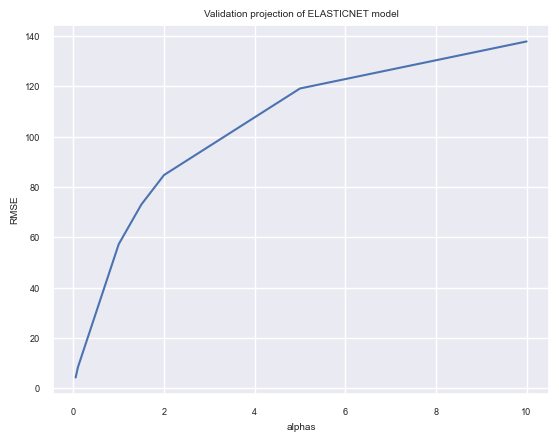

In [26]:
cv_el_series.plot(title= 'Validation projection of ELASTICNET model')
plt.xlabel('alphas')
plt.ylabel('RMSE')

In [27]:
#trying Lasso regression model
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]
cv_lasso_series = pd.Series(cv_lasso, index = alphas)
cv_lasso_series

0.05      0.163998
0.10      0.328000
1.00      3.280044
1.50      4.920068
2.00      6.560092
5.00     16.400250
10.00    32.453135
dtype: float64

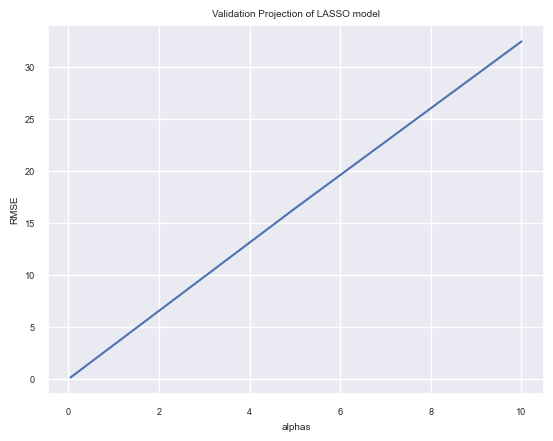

In [28]:
#tring visualize Lasso regression model
cv_lasso_series.plot(title = 'Validation Projection of LASSO model')
plt.xlabel('alphas')
plt.ylabel('RMSE')
plt.show()

In [29]:
#trying xgb regressor model
cv_xgb = [rmse_cv(XGBRegressor(alpha = alpha)).mean() for alpha in alphas]
cv_xgb_series = pd.Series(cv_xgb, index=alphas)
cv_xgb_series

0.05     62.654332
0.10     62.302662
1.00     62.972671
1.50     62.436091
2.00     63.322932
5.00     62.266784
10.00    61.543946
dtype: float64

Text(0, 0.5, 'RMSE')

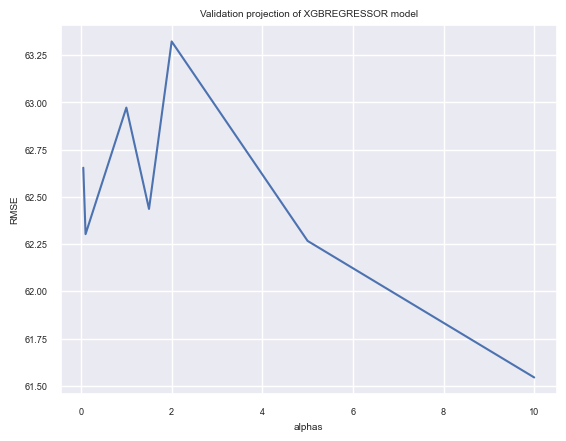

In [30]:
cv_xgb_series.plot(title = 'Validation projection of XGBREGRESSOR model')
plt.xlabel('alphas')
plt.ylabel('RMSE')

In [31]:
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge_series = pd.Series(cv_ridge, index=alphas)
cv_ridge_series

0.05     0.010872
0.10     0.021743
1.00     0.217161
1.50     0.325520
2.00     0.433731
5.00     1.079912
10.00    2.145264
dtype: float64

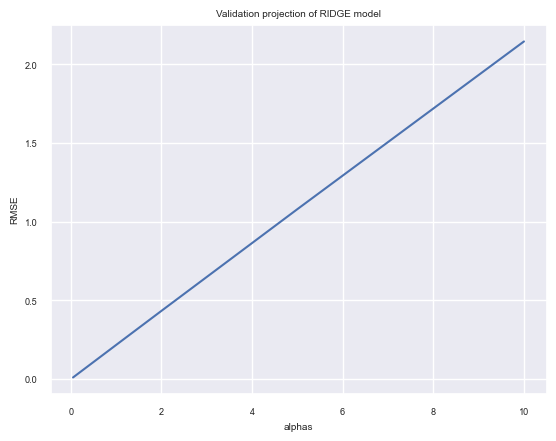

In [32]:
cv_ridge_series.plot(title = 'Validation projection of RIDGE model')
plt.xlabel('alphas')
plt.ylabel('RMSE')
plt.show()

In [33]:
cv_krr = [rmse_cv(KernelRidge(alpha = alpha)).mean() for alpha in alphas]
cv_krr_series = pd.Series(cv_krr, index = alphas)
cv_krr_series

0.05     0.010858
0.10     0.021714
1.00     0.216878
1.50     0.325095
2.00     0.433165
5.00     1.078507
10.00    2.142492
dtype: float64

In [34]:
X_train.to_csv('housepred_3rd_traindata.csv')
y_train.to_csv('housepred_3rd_testdata.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'